# GRIP At The Spark Foundation

## Name : Riya Bhatiya

## Task 2 : To explore Supervised Machine Learning.

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing pandas library for reading csv files , numpy and matplotlib for plotting graphs(Required lib.)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data from the link given
data = pd.read_csv("http://bit.ly/w-data")
print("Data")
data

Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### If we want to restrict our data upto 10 entry than follow the below code:

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data. We can create the plot with the following script:

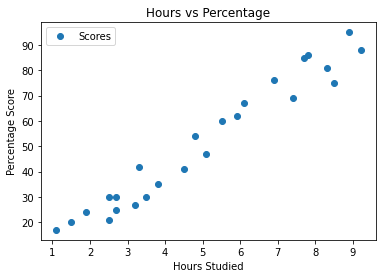

In [4]:
# Plotting the data graph for analysis.
data.plot(x='Hours', y='Scores', style='o', label='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.legend()
plt.show()

#### --Preparing the data

In [5]:
# Separating independent(input/attributes) and dependent(output/labels) values
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
#X = data['Hours'].values
#y = data['Scores'].values

In [6]:
#Spliting into training set and test set
#X_train = X[:20]
#y_train = y[:20]
#X_test = X[20:]
#y_test = y[20:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

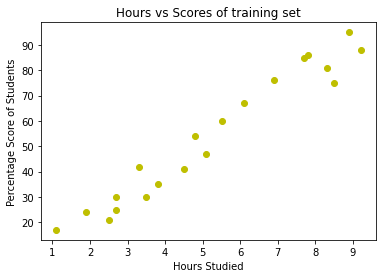

In [7]:
#Plotting training data into graph
plt.scatter(X_train, y_train, color='y')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score of Students') 
plt.title('Hours vs Scores of training set')  
plt.show()

#### --Training the Algorithm.

In [8]:
#Import LinearRegression from sklearn.linear_model and train the training set.
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(X_train, y_train) 
print("Training completed Successfully.")

Training completed Successfully.


#### To retrieve the intercept:

In [9]:
print(regr.intercept_)

2.018160041434683


In [10]:
print(regr.coef_)

[9.91065648]


#### This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

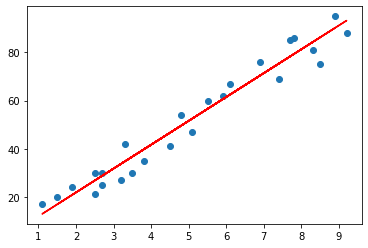

In [11]:
# Plotting the regression line
line = regr.coef_*X+regr.intercept_
#Y = m*X + C
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='r');
plt.show()

#### --Making Predictions


In [12]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regr.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Our own data prediction
hours = [[9.25]]
own_pred = regr.predict(hours)
print("No of Hours={}".format(hours))
print("Predicted Scores={}".format(own_pred[0]))

No of Hours=[[9.25]]
Predicted Scores=93.69173248737538


#### --Evaluating the model

In [15]:
#Evaluate the performance of Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
